# License 
***
Copyright (C) 2017 -- 2022 J. Patrick Hall, jphall@gwu.edu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

***
# Simple feature extraction - Pandas and Scikit-Learn

## Imports

In [ ]:
import pandas as pd              # pandas for handling mixed data sets 
import numpy as np               # numpy for basic math and matrix operations
import matplotlib.pyplot as plt  # pyplot for plotting

# scikit-learn for machine learning and data preprocessing
from sklearn.decomposition import PCA

## Perform basic feature extraction

#### Create a sample data set

In [ ]:
scratch_df = pd.DataFrame({'x1': [1, 2.5, 3, 4.5],
                           'x2': [1.5, 2, 3.5, 4]})

scratch_df

,x1,x2
0,1.0,1.5
1,2.5,2.0
2,3.0,3.5
3,4.5,4.0


#### Compress `x1` and `x2` into a single principal component

In [ ]:
pca = PCA(n_components=1)

In [ ]:
pca.fit(scratch_df)

PCA(n_components=1)

Principal components analysis finds vectors that represent that direction(s) of most variance in a data set. These are called *eigenvectors*.

In [ ]:
print('First eigenvector = ', pca.components_)

First eigenvector =  [[0.77653412 0.6300752 ]]


Principal components are the projection of the data onto these eigenvectors. Principal components are usually centered around zero and each principal component is uncorrelated with all the others, i.e. principal components are *orthogonal* to one-another. Becuase prinicipal components represent the highest variance dimensions in the data and are not correlated with one another, they do an excellent job summarizing a data set with only a few dimensions (e.g. columns) and PCA is probably the most popular feature extraction technique.

In [ ]:
scratch_df['Centered_PC1'] = pca.transform(scratch_df[['x1', 'x2']])
scratch_df['Non_centered_PC1'] = pca.transform(scratch_df[['x1', 'x2']] + pca.mean_)
scratch_df['PC1_x1_back_projection'] = pd.Series(np.arange(1,8,2)) * pca.components_[0][0]
scratch_df['PC1_x2_back_projection'] = pd.Series(np.arange(1,8,2)) * pca.components_[0][1]
scratch_df

,x1,x2,Centered_PC1,Non_centered_PC1,PC1_x1_back_projection,PC1_x2_back_projection
0,1.0,1.5,-2.146529,1.721647,0.776534,0.630075
1,2.5,2.0,-0.666690,3.201486,2.329602,1.890226
2,3.0,3.5,0.666690,4.534866,3.882671,3.150376
3,4.5,4.0,2.146529,6.014704,5.435739,4.410526


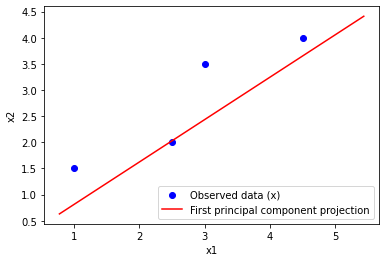

In [ ]:
x = plt.scatter(scratch_df.x1, scratch_df.x2, color='b')
pc, = plt.plot(scratch_df.PC1_x1_back_projection, scratch_df.PC1_x2_back_projection, color='r')
plt.legend([x, pc], ['Observed data (x)', 'First principal component projection'], loc=4)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()